DATA PREPROCCESSING

In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Arun\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df=df.drop("customerID",axis=1)
df.head(8)
print((df.columns))

ModuleNotFoundError: No module named 'pandas'

In [ ]:
from sklearn.preprocessing import LabelEncoder
binary_cols=["gender","Partner","Dependents","PhoneService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling"]
for i in binary_cols:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])


In [ ]:
import torch
import torch.version 
print(torch.version)

SyntaxError: '(' was never closed (dataloader.py, line 1)

In [ ]:
multi_col=["MultipleLines","InternetService","Contract","PaymentMethod","TotalCharges","Churn"]
df=pd.get_dummies(df,columns=multi_col,drop_first=True)
df.head()
df.fillna(df.median,inplace=True)
print(df.dtypes)


gender                 int32
SeniorCitizen          int64
Partner                int32
Dependents             int32
tenure                 int64
                       ...  
TotalCharges_998.1      bool
TotalCharges_999.45     bool
TotalCharges_999.8      bool
TotalCharges_999.9      bool
Churn_Yes               bool
Length: 6554, dtype: object


In [ ]:
import torch
from sklearn.model_selection import train_test_split
x=df.drop("Churn_Yes",axis=1)
y=df["Churn_Yes"]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)
device=torch.device("cuda" if torch.cuda.is_available() else "cpu" )

SyntaxError: '(' was never closed (dataloader.py, line 1)

In [ ]:
import torch
import numpy as np
x_train = x_train.astype('float32').to_numpy(copy=True)
x_test = x_test.astype('float32').to_numpy(copy=True)
y_train = y_train.astype('float32').to_numpy(copy=True)
y_test = y_test.astype('float32').to_numpy(copy=True)

x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.LongTensor(y_train)
y_test= torch.LongTensor(y_test)
print((x_train.shape))

torch.Size([4930, 6553])


ANN MODEL

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class perceptron(nn.Module):
    def __init__(self,input_feature=6553, hidden1=19,hidden2=19,output=2):
        super().__init__()
        self.layer1=nn.Linear(input_feature,hidden1)
        self.layer2=nn.Linear(hidden1,hidden2)
        self.layer3=nn.Linear(hidden2,output)
    def forward(self,x):
        x=F.relu(self.layer1(x))
        x=F.relu(self.layer2(x))
        self.layer3(x)
        return x

In [ ]:
torch.cuda.manual_seed(30)
model=perceptron(input_feature=6553)

In [ ]:
model.parameters

<bound method Module.parameters of perceptron(
  (layer1): Linear(in_features=6553, out_features=19, bias=True)
  (layer2): Linear(in_features=19, out_features=19, bias=True)
  (layer3): Linear(in_features=19, out_features=2, bias=True)
)>

In [ ]:
loss_funcion=nn.CrossEntropyLoss() 
optimizer=torch.optim.Adam(model.parameters(),lr=0.01) 

In [ ]:
epoch=500
final_loss=[]
for i in range(epoch):
    i=i+1
    y_pred=model.forward(x_train)
    loss=loss_funcion(y_pred,y_train)
    final_loss.append(loss)
    if i%10==1:
        print(f"epoch number is{i} and the loss is {loss}")
        
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

epoch number is1 and the loss is 2.9775266647338867
epoch number is11 and the loss is 1.5677565336227417
epoch number is21 and the loss is 1.3992488384246826
epoch number is31 and the loss is 1.3054572343826294
epoch number is41 and the loss is 1.2366825342178345
epoch number is51 and the loss is 1.1700347661972046
epoch number is61 and the loss is 1.1045994758605957
epoch number is71 and the loss is 1.0490163564682007
epoch number is81 and the loss is 1.0014338493347168
epoch number is91 and the loss is 0.9554648995399475
epoch number is101 and the loss is 0.9145539402961731
epoch number is111 and the loss is 0.8826487064361572
epoch number is121 and the loss is 0.8599116206169128
epoch number is131 and the loss is 0.844412624835968
epoch number is141 and the loss is 0.8341180682182312
epoch number is151 and the loss is 0.827243983745575
epoch number is161 and the loss is 0.8226662278175354
epoch number is171 and the loss is 0.8195176124572754
epoch number is181 and the loss is 0.8172

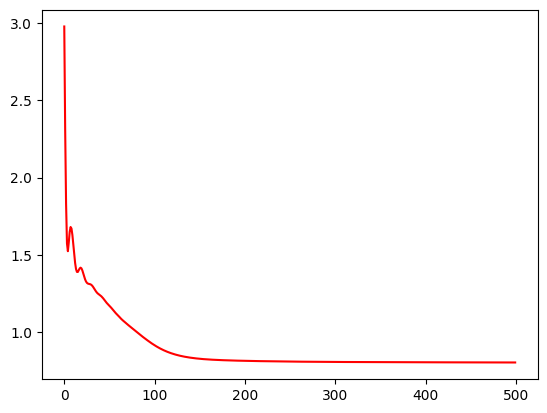

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(range(epoch),torch.tensor(final_loss),color="red")
plt.show()

PREDICTION

In [ ]:
prediction=[]
with torch.no_grad():
    for i,data in enumerate(x_test):
        prediction.append(model(data).argmax().item())
        print(model(data).argmax().item())


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1560
           1       0.00      0.00      0.00       553

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.55      0.74      0.63      2113

[[1560    0]
 [ 553    0]]
0.7382867960246096


c:\Users\Arun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Arun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Arun\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag